# Univalle Energy

## Description about this project

## Feature engineering - Data transformation
This phase will be divided into two parts, one is the representation of data and the other is the extraction and selection features.

In this notebook the data will be explored. So, non-numerical data will be encoded with numbers to represent them. Finally, a file will be exported with the transformed data.

In [1]:
#Install scikit learn
#!pip install scikit-learn --upgrade
#!pip install matplotlib
#!pip install seaborn

## Import libraries

In [2]:
# Pandas
import pandas as pd

# Numpy
import numpy as np

#*******************************************************************************************
#To see the supplied dataset, we can use the matplotlib and seaborn libraries:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import dataset
Import dataset to pandas dataframe

In [3]:
df = pd.read_csv('../data/dataset_consumo_energia_uv_1.csv')
df.tail()

,CONTRATO,PRODUCTO,ID_SERVICIO,SBSERVICIO,ESTADO_DE_CUENTA,CUENTA_DE_COBRO,SBSIGNO,ID_CONCEPTO,SBCONCEPTO,FINANCIABLE,...,IVA,UNIDADES,CONSECUTIVO_DOC,DOCUMENTO_SOPORTE,PROGRAMA,USUARIO,TERMINAL,FECHA_DEL_CARGO,CAUSA,FECHA_CONTABLE
3261,46530656,12953193,6140,Energ�a Domiciliario,376256594,1075514127,DB,1039,VALOR CONSUMO ENERGIA,S,...,0,6660.0,3054618889,CO-202311-TC-0003,FGCA,LEONROJT,emcalipdn,21/11/2023 04:44:42 p.m.,-1,24/11/2023
3262,46530656,12953193,6140,Energ�a Domiciliario,378438761,1079902067,DB,1039,VALOR CONSUMO ENERGIA,S,...,0,6600.0,3079442550,CO-202312-TC-0003,FGCA,LEONROJT,emcalipdn,18/12/2023 09:45:46 a.m.,-1,21/12/2023
3263,46530656,12953193,6140,Energ�a Domiciliario,380600778,1084253251,DB,1039,VALOR CONSUMO ENERGIA,S,...,0,7800.0,3133092841,CO-202401-TC-0003,FGCA,JORGRIC1,emcalipdn,23/01/2024 03:49:00 p.m.,-1,25/01/2024
3264,46530656,12953193,6140,Energ�a Domiciliario,382596485,1088016373,DB,1039,VALOR CONSUMO ENERGIA,S,...,0,8820.0,3157578108,CO-202402-TC-0003,FGCA,LEONROJT,emcalipdn,15/02/2024 10:36:29 p.m.,-1,17/02/2024
3265,46530656,12953193,6140,Energ�a Domiciliario,384742340,1092189546,DB,1039,VALOR CONSUMO ENERGIA,S,...,0,8640.0,3184208219,CO-202403-TC-0003,FGCA,LEONROJT,emcalipdn,15/03/2024 01:38:51 p.m.,-1,16/03/2024


In [4]:
print("Tamaño del dataset")
print(f'Total filas: {df.shape[0]}')
print(f'Total columnas: {df.shape[1]}')

Tamaño del dataset
Total filas: 3266
Total columnas: 24


## Description

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3266 entries, 0 to 3265
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CONTRATO             3266 non-null   int64  
 1   PRODUCTO             3266 non-null   int64  
 2   ID_SERVICIO          3266 non-null   int64  
 3   SBSERVICIO           3266 non-null   object 
 4   ESTADO_DE_CUENTA     3266 non-null   int64  
 5   CUENTA_DE_COBRO      3266 non-null   int64  
 6   SBSIGNO              3266 non-null   object 
 7   ID_CONCEPTO          3266 non-null   int64  
 8   SBCONCEPTO           3266 non-null   object 
 9   FINANCIABLE          3266 non-null   object 
 10  MES                  3266 non-null   int64  
 11  AÑO                  3266 non-null   int64  
 12  PERIODO_FACTURACION  3266 non-null   int64  
 13  VALOR                3266 non-null   float64
 14  IVA                  3266 non-null   int64  
 15  UNIDADES             3266 non-null   f

In [6]:
# No hay datos faltantes

In [7]:
# Eliminación de columnas
drop_columns = ['PRODUCTO', 
                'SBSERVICIO',
                'ID_SERVICIO',
                'ID_CONCEPTO',
                'CUENTA_DE_COBRO', 
                'SBCONCEPTO',
                'FINANCIABLE',
                'IVA', 
                'DOCUMENTO_SOPORTE', 
                'PROGRAMA', 
                'USUARIO', 
                'TERMINAL', 
                'FECHA_DEL_CARGO',
                'CAUSA', 
                'FECHA_CONTABLE'
               ]

In [8]:
df.drop(drop_columns, axis=1, inplace=True)
df.tail()

,CONTRATO,ESTADO_DE_CUENTA,SBSIGNO,MES,AÑO,PERIODO_FACTURACION,VALOR,UNIDADES,CONSECUTIVO_DOC
3261,46530656,376256594,DB,11,2023,226467,5375725.56,6660.0,3054618889
3262,46530656,378438761,DB,12,2023,226523,5369134.98,6600.0,3079442550
3263,46530656,380600778,DB,1,2024,226673,6406658.70,7800.0,3133092841
3264,46530656,382596485,DB,2,2024,226771,7111362.26,8820.0,3157578108
3265,46530656,384742340,DB,3,2024,226917,7099121.66,8640.0,3184208219


In [9]:
print("Tamaño del dataset luego de eliminación de columnas")
print(f'Total filas: {df.shape[0]}')
print(f'Total columnas: {df.shape[1]}')

Tamaño del dataset luego de eliminación de columnas
Total filas: 3266
Total columnas: 9


In [10]:
# Showing the null data from the dataset
print("Valores nulos del dataset: \n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos del dataset: 
CONTRATO               0
ESTADO_DE_CUENTA       0
SBSIGNO                0
MES                    0
AÑO                    0
PERIODO_FACTURACION    0
VALOR                  0
UNIDADES               0
CONSECUTIVO_DOC        0
dtype: int64



In [11]:
# Valores únicos de cada columna
for col in df.columns:
    print(f"Valores únicos en la columna '{col}': {df[col].unique()}")
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - -")

Valores únicos en la columna 'CONTRATO': [   65110    65108    65111    74478  1008339  1008340  1008341  1008342
  1009239  1300273  1300278  1300279  1300281  1302801  1303048 46530656]
- - - - - - - - - - - - - - - - - - - - - - - - - - - -
Valores únicos en la columna 'ESTADO_DE_CUENTA': [   115201  12503527  14024221 ... 380600778 382596485 384742340]
- - - - - - - - - - - - - - - - - - - - - - - - - - - -
Valores únicos en la columna 'SBSIGNO': ['DB' 'CR']
- - - - - - - - - - - - - - - - - - - - - - - - - - - -
Valores únicos en la columna 'MES': [ 4  5  6  7  8  9 10 11  1  2  3 12]
- - - - - - - - - - - - - - - - - - - - - - - - - - - -
Valores únicos en la columna 'AÑO': [2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2021 2022 2023 2024 2020]
- - - - - - - - - - - - - - - - - - - - - - - - - - - -
Valores únicos en la columna 'PERIODO_FACTURACION': [   579    580  60604  60704  60804  60904  61004  61104  70104  70204
  70304  70404  70504  70604  7070

In [12]:
print(f"Total de valores únicos para la columna 'VALOR': {len(df['VALOR'].unique())}")
print(f"Total de valores únicos para la columna 'UNIDADES': {len(df['UNIDADES'].unique())}")

Total de valores únicos para la columna 'VALOR': 3254
Total de valores únicos para la columna 'UNIDADES': 1846


## Histogramas

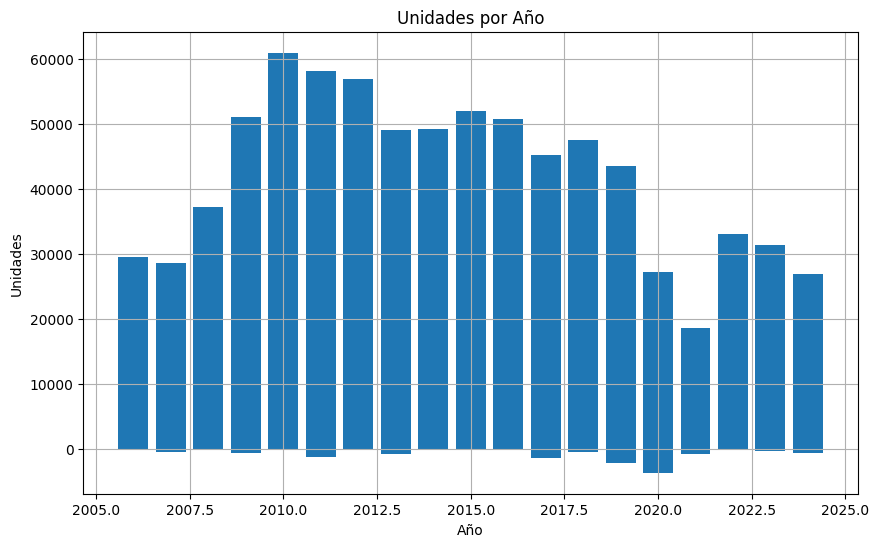

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(df['AÑO'], df['UNIDADES'])
plt.xlabel('Año')
plt.ylabel('Unidades')
plt.title('Unidades por Año')
plt.grid(True)
plt.show()

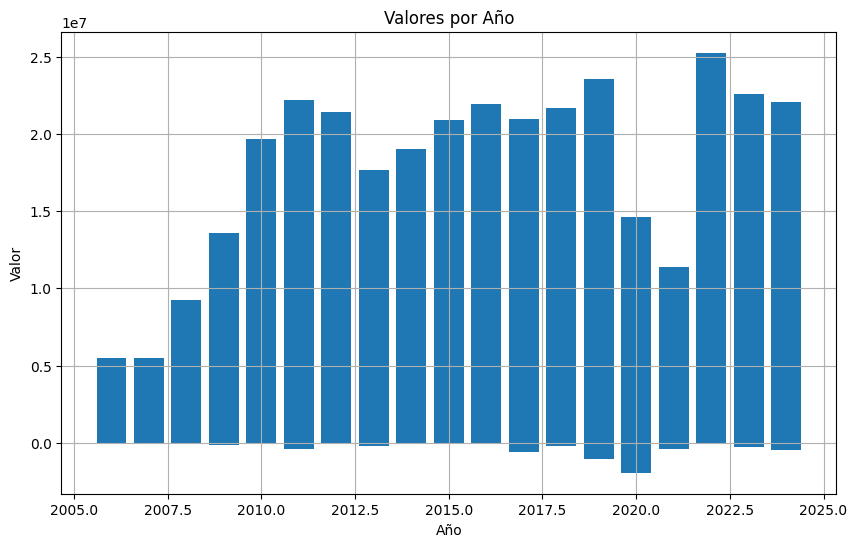

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(df['AÑO'], df['VALOR'])
plt.xlabel('Año')
plt.ylabel('Valor')
plt.title('Valores por Año')
plt.grid(True)
plt.show()

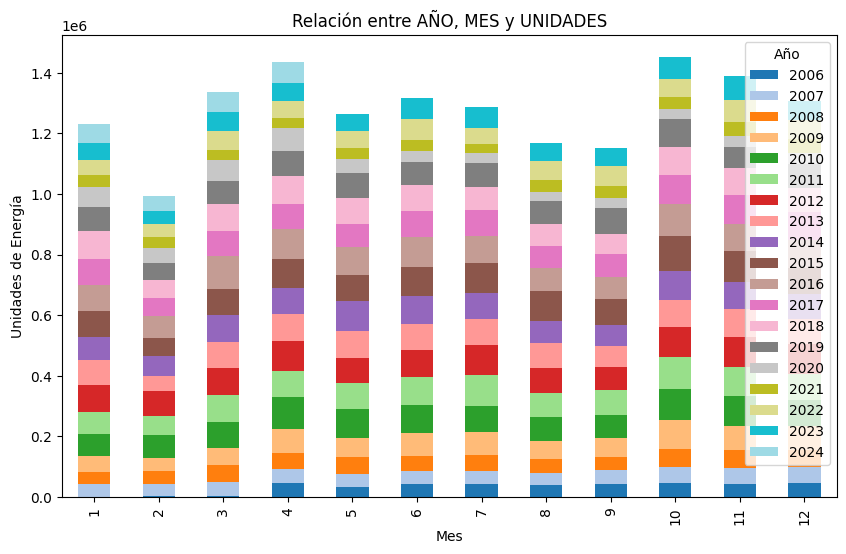

In [15]:
# Agregar datos en caso de duplicados (suma las unidades por año y mes)
df_grouped = df.groupby(['AÑO', 'MES'], as_index=False).sum()

# Pivoteamos los datos para tener los años como columnas
df_pivot = df_grouped.pivot(index='MES', columns='AÑO', values='UNIDADES')

# Crear gráfico de barras apiladas
df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# Agregar títulos y etiquetas
plt.title('Relación entre AÑO, MES y UNIDADES')
plt.xlabel('Mes')
plt.ylabel('Unidades de Energía')

# Mostrar leyenda
plt.legend(title='Año')

# Mostrar el gráfico
plt.show()